In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df=pd.read_csv('raw.csv')
df

,NEOC,Area,Distance,GFA,Elapsed Period,Std_Net_Area,Lease Ratio,Market_Vacancy,NOC,YN,...,SD,MR,CAMF,E_Ratio,RF,FO,TI,E_MR,TI.1,FO+TI
0,75092,1,217,4975,35,181,0.035,0.097,164091,1,...,700000.0,70000.0,28000.0,0.597230,3.4,2.0,300000.0,44847.33333,2.559429,0.911886
1,78249,1,166,4974,28,167,0.063,0.097,184023,1,...,700000.0,70000.0,28000.0,0.532543,4.0,2.0,300000.0,41670.83333,2.282143,0.856429
2,157667,1,0,28627,36,708,0.018,0.097,296667,1,...,1250000.0,129000.0,49000.0,0.600000,3.0,1.0,0.0,94600.00000,0.000000,0.200000
3,141599,1,440,15105,28,366,0.016,0.097,272579,1,...,1225000.0,122500.0,46500.0,0.620003,3.0,2.0,0.0,87791.66667,0.000000,0.400000
4,141599,1,440,15105,28,366,0.013,0.097,272579,1,...,1225000.0,122500.0,46500.0,0.620003,3.0,2.0,0.0,87791.66667,0.000000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,110611,3,350,11051,27,253,0.016,0.080,230439,1,...,720000.0,72000.0,38000.0,0.477350,3.0,1.0,0.0,52800.00000,0.000000,0.200000
511,170866,3,263,16466,2,305,0.136,0.038,322237,1,...,1280000.0,128000.0,45000.0,0.536872,3.0,2.0,0.0,91733.33333,0.000000,0.400000
512,170866,3,263,16466,2,305,0.065,0.038,322237,1,...,1280000.0,128000.0,45000.0,0.536872,3.0,2.0,0.0,91733.33333,0.000000,0.400000
513,174840,3,263,16466,2,305,0.012,0.038,322237,1,...,1280000.0,128000.0,45000.0,0.536872,3.0,1.0,0.0,93866.66667,0.000000,0.200000


In [8]:
from sklearn.model_selection import train_test_split
x = df[['GFA', 'Elapsed Period','Area','Period',
        'Distance','Market_Vacancy']]
y = df[['NOC']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [9]:
x_data = sm.add_constant(x, has_constant = "add")

C:\Users\dohee\miniconda3\envs\statistics\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
multi_model = sm.OLS(y, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOC   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     106.5
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.42e-86
Time:                        22:22:24   Log-Likelihood:                -6213.0
No. Observations:                 515   AIC:                         1.244e+04
Df Residuals:                     508   BIC:                         1.247e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.089e+05   7692.498     40.159      0.000    2.94e+05    3.24e+05
GFA                1.7719      0.116     15.249      0.000       1.544       2.000
Elapsed Period -1411.6999    141.800     -9.956      0.000   -1690.287   -1133.112
Area           -1.549e+04   1330.371    -11.645      0.000   -1.81e+04   -1.29e+04
Period         -4272.2624   2343.306     -1.823      0.069   -8876.027     331.502
Distance         -44.4726      9.257     -4.804      0.000     -62.659     -26.286
Market_Vacancy -4.356e+04   4.44e+04     -0.980      0.328   -1.31e+05    4.38e+04
==============================================================================
Omnibus:                       52.922   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.127
Skew:                          -0.705   Prob(JB):                     3.99e-18
Kurtosis:                       4.322   Cond. No.                     7.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
fitted_multi_model.params

const             308920.904511
GFA                    1.771869
Elapsed Period     -1411.699860
Area              -15492.633806
Period             -4272.262438
Distance             -44.472611
Market_Vacancy    -43559.836356
dtype: float64

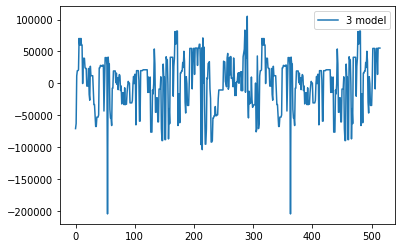

In [17]:
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "3 model")
# fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

In [19]:
x.corr()

,GFA,Elapsed Period,Area,Period,Distance,Market_Vacancy
GFA,1.000000,-0.082679,0.039797,-0.093597,-0.335489,0.065875
Elapsed Period,-0.082679,1.000000,-0.231787,0.097528,-0.114499,0.162199
Area,0.039797,-0.231787,1.000000,-0.135804,0.293392,-0.416283
Period,-0.093597,0.097528,-0.135804,1.000000,0.117090,0.514089
Distance,-0.335489,-0.114499,0.293392,0.117090,1.000000,-0.111913
Market_Vacancy,0.065875,0.162199,-0.416283,0.514089,-0.111913,1.000000


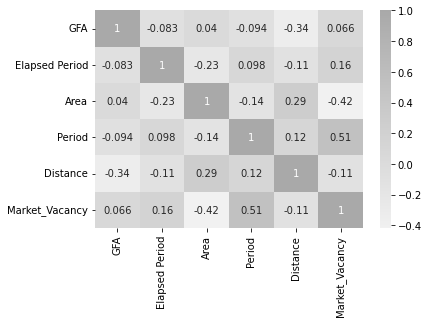

In [20]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(x.corr(), annot = True, cmap = cmap)
plt.show()

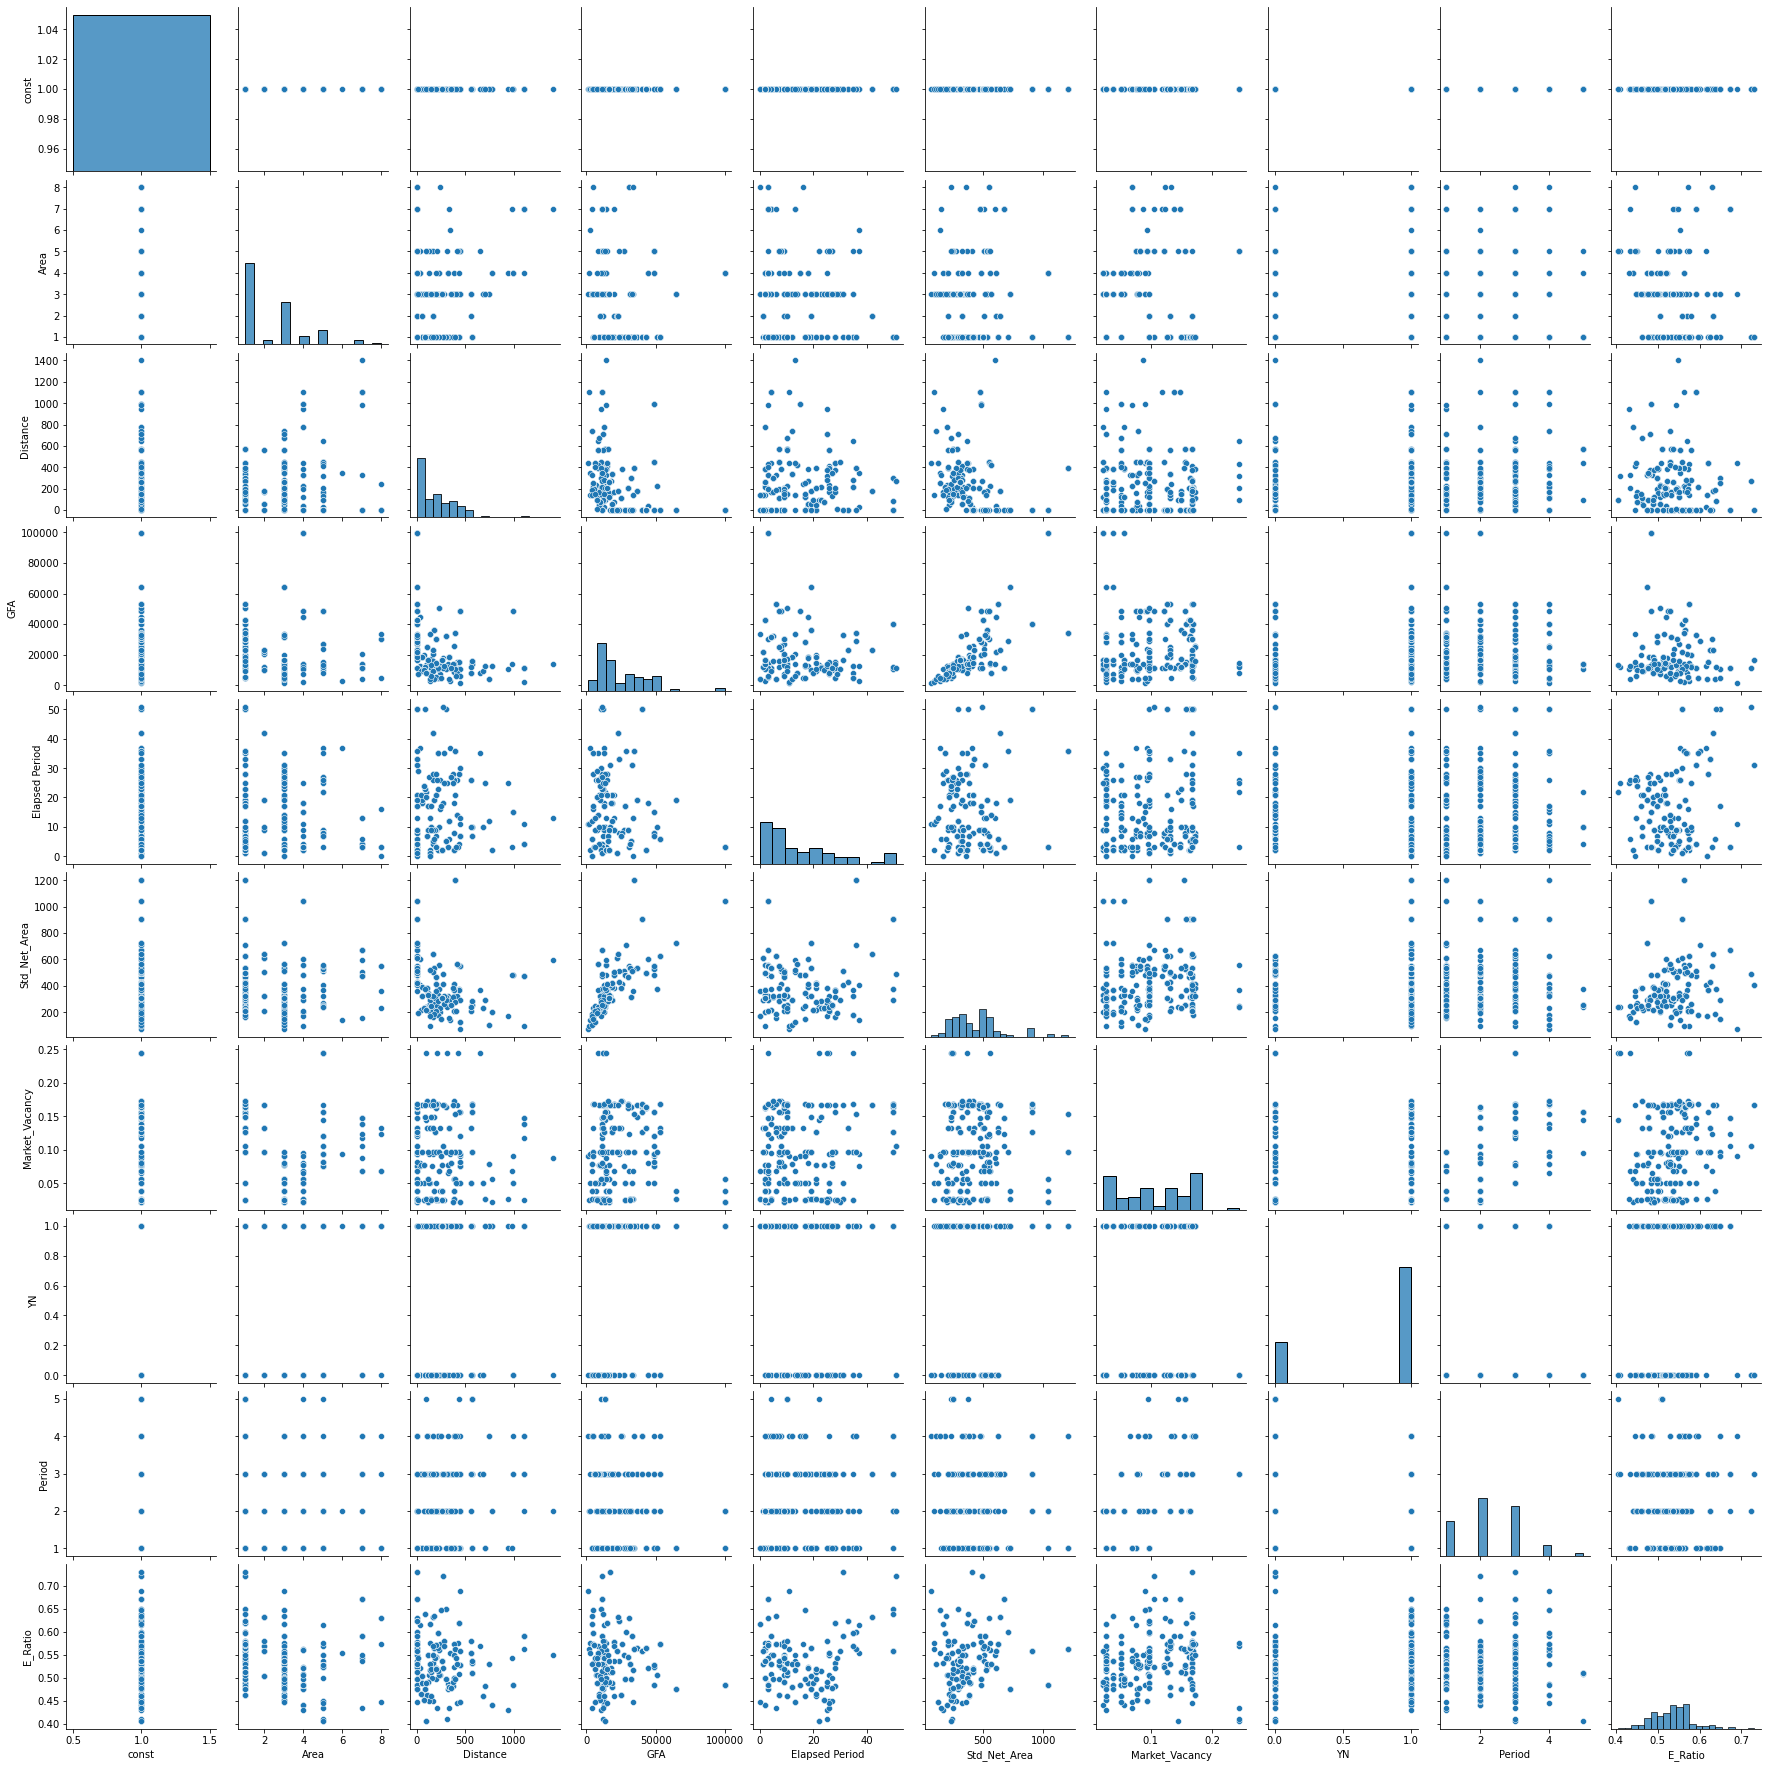

In [ ]:
sns.pairplot(x_data)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif


,VIF Factor,features
0,4.263376,Area
1,2.336443,Distance
2,3.556692,GFA
3,2.469884,Elapsed Period
4,8.282760,Market_Vacancy
5,4.187098,YN
6,9.489976,Period
7,21.240879,E_Ratio


In [ ]:
from sklearn.model_selection import train_test_split

X = x
y = y

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(360, 9) (155, 9) (360, 1) (155, 1)


In [ ]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

NameError: name 'plt' is not defined